In [1]:
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras                     import regularizers
from keras.models              import Sequential
from keras.layers              import Dense
from keras.layers              import Dropout
from keras.layers              import Conv2D
from keras.layers              import Activation
from keras.layers              import MaxPooling2D
from keras.layers              import Flatten
from keras.layers              import BatchNormalization
from keras.datasets            import cifar10
from keras.callbacks           import ReduceLROnPlateau
from keras.optimizers          import RMSprop
from matplotlib.pyplot         import imshow
from keras.utils.np_utils      import to_categorical
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator


print("\nImporting ✓\n")

Using TensorFlow backend.



Importing ✓



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("\nLoading ✓\n")



Loading ✓



In [0]:
def getClass(x):
    return {
        0: "Airplane",
        1: "Automobile",
        2: "Bird",
        3: "Cat",
        4: "Deer",
        5: "Dog",
        6: "Frog",
        7: "Horse",
        8: "Ship",
        9: "Truck",
    }[x]
  
def check(x):
    if x >= 0.8400:
      return "\nPass ✓✓✓\n"
    return "\nFail ✗✗✗\n"

In [4]:
print("\nThe classes we have are :\n")

classes = np.unique(y_train)

for i in range(len(classes)):
  x = classes[i]
  print("                         " , x , "-> " + getClass(x))



The classes we have are :

                          0 -> Airplane
                          1 -> Automobile
                          2 -> Bird
                          3 -> Cat
                          4 -> Deer
                          5 -> Dog
                          6 -> Frog
                          7 -> Horse
                          8 -> Ship
                          9 -> Truck


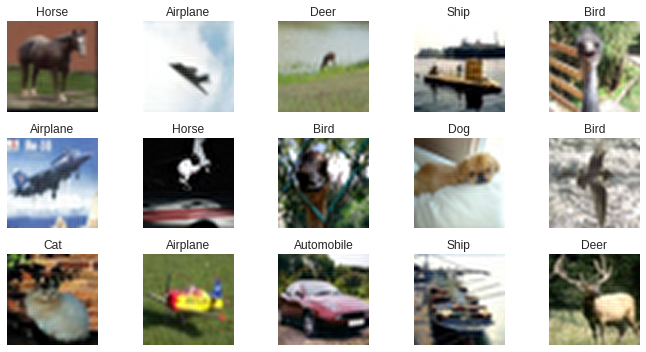

In [5]:
indices = np.random.randint(0, 50000, 15)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5),subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, index in zip(axes.flat, indices):
    ax.imshow(x_train[index], interpolation='sinc', cmap='viridis')
    ax.set_title(str(getClass(y_train[index][0])))

plt.tight_layout()
plt.show()

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train.reshape(-1, 32, 32, 3) / 255 
x_test  =  x_test.reshape(-1, 32, 32, 3) / 255
print(x_train.shape)

y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test ,10)
print(y_train.shape)


print("\nReshaping ✓\n")

(50000, 32, 32, 3)
(50000, 10)

Reshaping ✓



In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=0)

In [0]:
model = Sequential()

model.add(Conv2D(128, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())


model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

In [9]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
compiled_model = model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print("\nCompiling ✓\n")


Compiling ✓



In [0]:
# learning rate annealer
learning_rate_reduction = ReduceLROnPlateau( monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [12]:
fitting_model = model.fit_generator( datagen.flow(x_train,y_train, batch_size=100), epochs = 32,validation_data = (x_val,y_val),verbose = 1,callbacks=[learning_rate_reduction])


print("\nTraining ✓\n")

Epoch 1/32
450/450 [==============================] - 71s 158ms/step - loss: 2.1330 - acc: 0.3210 - val_loss: 2.4637 - val_acc: 0.2718
Epoch 2/32
450/450 [==============================] - 67s 149ms/step - loss: 1.4005 - acc: 0.4956 - val_loss: 1.5425 - val_acc: 0.4680
Epoch 3/32
450/450 [==============================] - 67s 150ms/step - loss: 1.1535 - acc: 0.6000 - val_loss: 1.0864 - val_acc: 0.6264
Epoch 4/32
450/450 [==============================] - 67s 149ms/step - loss: 0.9868 - acc: 0.6661 - val_loss: 1.2442 - val_acc: 0.6222
Epoch 5/32
450/450 [==============================] - 67s 149ms/step - loss: 0.8711 - acc: 0.7092 - val_loss: 0.9847 - val_acc: 0.7162
Epoch 6/32
450/450 [==============================] - 67s 149ms/step - loss: 0.7978 - acc: 0.7378 - val_loss: 0.8925 - val_acc: 0.7400
Epoch 7/32
450/450 [==============================] - 67s 149ms/step - loss: 0.7197 - acc: 0.7608 - val_loss: 0.9672 - val_acc: 0.7282
Epoch 8/32
450/450 [==============================] - 6

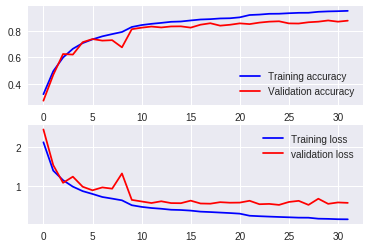

In [13]:
fig, ax = plt.subplots(2,1)

# Plot the accuracy curve for training and validation 
ax[0].plot(fitting_model.history['acc'], color='b', label="Training accuracy")
ax[0].plot(fitting_model.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

# Plot the loss curve for training and validation 
ax[1].plot(fitting_model.history['loss'], color='b', label="Training loss")
ax[1].plot(fitting_model.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

print(check(scores[1]))

10000/10000 [==============================] - 7s 743us/step
Test loss: 0.6448749414920807
Test accuracy: 0.8652

Pass ✓✓✓

